# Mehmet Uzel

In [4]:
import pandas as pd
import numpy as np
import time

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# In this notebook I used the classic Titanic dataset

In [68]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
Train_X = train.copy()

In [71]:
Train_X["Sex"] = Train_X["Sex"].astype("category")

In [72]:
Train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
Train_X["Sex"] = Train_X["Sex"].cat.codes

In [74]:
Train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [75]:
Train_X.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q


In [76]:
Train_X["Age"].fillna(round(Train_X["Age"].mean()),inplace=True)

In [77]:
Train_X.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q


In [97]:
Train_X["Fare"].isnull().sum()

0

In [78]:
Train_X["Embarked"].fillna("S",inplace=True)

In [79]:
Train_X["Embarked"].isnull().sum()

0

In [81]:
Train_X["Embarked"] = Train_X["Embarked"].astype("category")
Train_X["Embarked"] = Train_X["Embarked"].cat.codes
Train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [82]:
Train_X["Cabin"].fillna("XX", inplace=True)

"XX" means this value is missing

In [83]:
Train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,XX,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,XX,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,XX,2


In [84]:
Train_X["Cabin"] = Train_X["Cabin"].astype("category")
Train_X["Cabin"] = Train_X["Cabin"].cat.codes
Train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [85]:
Train_X = Train_X.drop(["Ticket"],axis=1)

In [86]:
Train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,147,2


In [88]:
Train_X[["Cabin","Survived"]].groupby(["Cabin"],as_index=False).mean()

,Cabin,Survived
0,0,0.000000
1,1,0.000000
2,2,1.000000
3,3,0.000000
4,4,1.000000
...,...,...
143,143,0.000000
144,144,1.000000
145,145,0.500000
146,146,0.000000


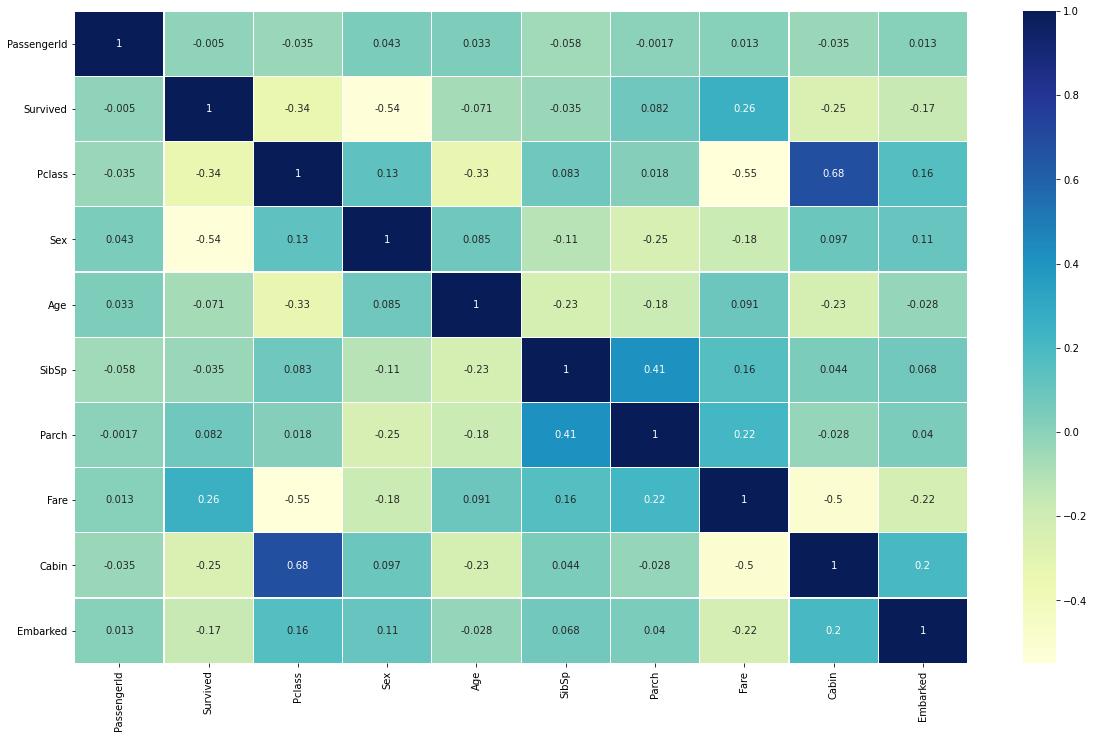

In [90]:
sns.heatmap(Train_X.corr(),annot=True,linewidths=0.2,cmap="YlGnBu")
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [91]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
Test_X = test.copy()
Test_X["Sex"] = Test_X["Sex"].astype("category")
Test_X["Sex"] = Test_X["Sex"].cat.codes

I tried using both mean and median values for missing data and this using mean give better results for this dataset

In [108]:
Test_X["Age"].fillna(round(Test_X["Age"].mean()),inplace=True)
Test_X["Embarked"].fillna("S",inplace=True)
Test_X["Embarked"] = Test_X["Embarked"].astype("category")
Test_X["Embarked"] = Test_X["Embarked"].cat.codes
Test_X["Cabin"].fillna("XX", inplace=True)
Test_X["Cabin"] = Test_X["Cabin"].astype("category")
Test_X["Cabin"] = Test_X["Cabin"].cat.codes
Test_X["Fare"].fillna(Test_X["Fare"].mean(),inplace=True)
Test_X = Test_X.drop(["Ticket","Name","PassengerId"],axis=1)
Test_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,76,1
1,3,0,47.0,1,0,7.0000,76,2
2,2,1,62.0,0,0,9.6875,76,1
3,3,1,27.0,0,0,8.6625,76,2
4,3,0,22.0,1,1,12.2875,76,2


In [109]:
Train_Y = Train_X["Survived"]
Train_x = Train_X.drop(["Name","Survived","PassengerId"],axis=1)

In [110]:
Train_x.shape, Train_Y.shape, Test_X.shape

((891, 8), (891,), (418, 8))

In [128]:
random_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, max_depth=50,min_samples_split=4)
%time random_forest.fit(Train_x, Train_Y)

CPU times: user 669 ms, sys: 10.7 ms, total: 680 ms
Wall time: 680 ms


RandomForestClassifier(max_depth=50, max_leaf_nodes=100, min_samples_split=4,
                       n_estimators=500)

In [129]:
randomf_Y_preds = random_forest.predict(Test_X)
random_forest.score(Train_x, Train_Y)
randomf_acc = random_forest.score(Train_x, Train_Y)
randomf_acc

0.9427609427609428

In [135]:
rf_parameters={"max_depth":[50,100,150,200,250],
          "max_features":[2,3,5,6,7,8],
          "n_estimators":[100,300,500,700],
          "min_samples_split":[2,3,4,6,8,10],
          "max_leaf_nodes":[50,80,100,150]}

In [136]:
rf_model = RandomForestClassifier()

In [137]:
rf_cv_model= GridSearchCV(rf_model,
                         rf_parameters,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

In [138]:
%time rf_cv_model.fit(Train_x,Train_Y)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

CPU times: user 58.1 s, sys: 4.37 s, total: 1min 2s
Wall time: 1h 20min 5s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, 200, 250],
                         'max_features': [2, 3, 5, 6, 7, 8],
                         'max_leaf_nodes': [50, 80, 100, 150],
                         'min_samples_split': [2, 3, 4, 6, 8, 10],
                         'n_estimators': [100, 300, 500, 700]},
             verbose=2)

Yes you are right I spend 80 minutes for parameter tuning 

In [139]:
print("The Best Parameters: "+str(rf_cv_model.best_params_))

The Best Parameters: {'max_depth': 200, 'max_features': 3, 'max_leaf_nodes': 150, 'min_samples_split': 8, 'n_estimators': 100}


In [140]:
randomf_tuned = RandomForestClassifier(max_depth=200,max_features=3,max_leaf_nodes=150,min_samples_split=8,n_estimators=100)
randomf_tuned.fit(Train_x,Train_Y)

RandomForestClassifier(max_depth=200, max_features=3, max_leaf_nodes=150,
                       min_samples_split=8)

In [142]:
random_forest_Y_pred = randomf_tuned.predict(Test_X)
random_forest.score(Train_x, Train_Y)
random_forest_accuracy = randomf_tuned.score(Train_x, Train_Y)
random_forest_accuracy

0.9248035914702581

## submission

In [145]:
random_forest_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": random_forest_Y_pred})
random_forest_submission.to_csv('random_forest_submission.csv', index=False)